In [1]:
import mysql.connector
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [42]:
conn = mysql.connector.connect(
 host='127.0.0.1',
 user='root',
 password='root1234',
 database='deli_meds'
)

In [43]:
def fetch_data(query):
 cursor = conn.cursor()
 cursor.execute(query)
 columns = [column[0] for column in cursor.description]
 data = cursor.fetchall()
 cursor.close()
 return pd.DataFrame(data, columns=columns)


# First Query:
To find top 10 Pharmacy's which has most orders from.

In [4]:
query = """
SELECT
    p.Pharmacy_Name As Pharmacy,
    COUNT(c.Cart_ID) AS TotalOrders
FROM
    Cart c, pharmacy p
WHERE
    c.Order_ID IS NOT NULL AND c.Pharmacy_ID = p.Pharmacy_ID
GROUP BY
    c.Pharmacy_ID
ORDER BY
    TotalOrders DESC
LIMIT 10;
"""

top_pharmacies = fetch_data(query)

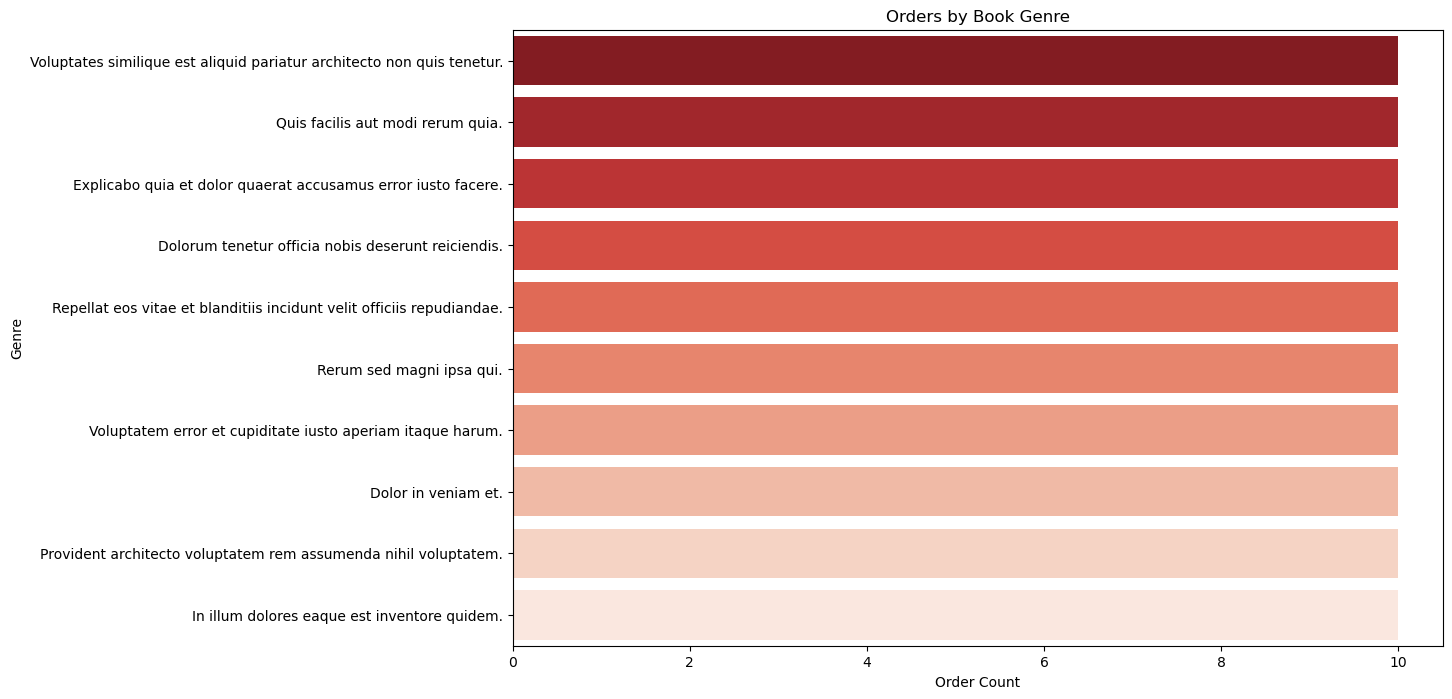

In [57]:
plt.figure(figsize=(12, 8))
sns.barplot(x='TotalOrders', y='Pharmacy', data=top_pharmacies, palette='Reds_r')
plt.title('Orders by Book Genre')
plt.xlabel('Order Count')
plt.ylabel('Genre')
plt.show()

here based on the visualization we can see that the top 10 Pharmacy's are all equal in their sales with each having 10 orders.

# Second Query:
To find top 10 Customers's based on their average spending from our website.

In [6]:
query = """
SELECT c.Customer_Firstname as Customers, AVG(p.Amount) AS AverageAmountPaid
    FROM Orders o
    JOIN customer c ON c.Customer_ID = o.Customer_ID
    JOIN Payment p ON o.Order_ID = p.Order_ID
    GROUP BY c.Customer_ID
    ORDER BY AverageAmountPaid DESC
    LIMIT 10;
"""

top_customers= fetch_data(query)

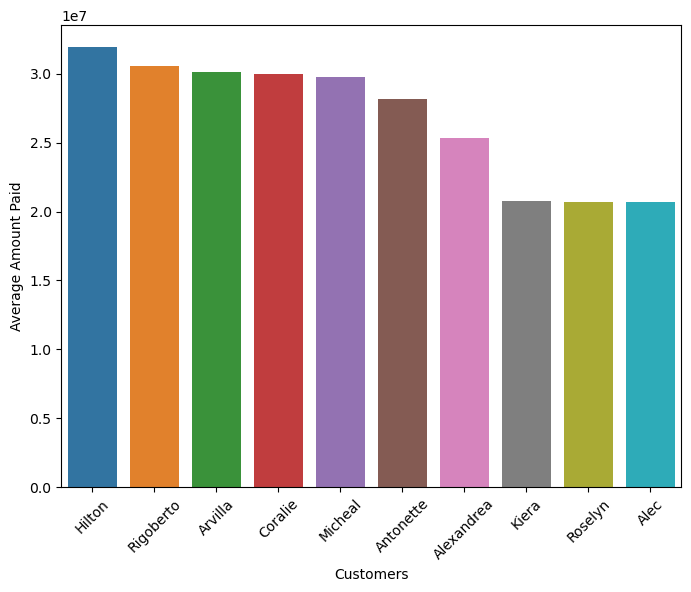

In [7]:
plt.figure(figsize=(8, 6))
sns.barplot(x='Customers', y='AverageAmountPaid', data=top_customers)

plt.xlabel('Customers')
plt.ylabel('Average Amount Paid')
plt.xticks(rotation=45)
plt.show()

# Third Query:
Conversion percentage from customers adding to the cart and then converting those carts to orders.

In [34]:
query = """
SELECT
    COUNT(CASE WHEN Order_ID IS NULL THEN 1 END) AS CartsWithoutOrders,
    COUNT(*) AS TotalCarts,
    (COUNT(CASE WHEN Order_ID IS NULL THEN 1 END) / COUNT(*)) * 100 AS Percentage
FROM
    Cart;
GROUP BY
    cartWithoutOrders;Own_Products
"""

ordered_percentage = fetch_data(query)

In [35]:
ordered_percentage.head()

,CartsWithoutOrders,TotalCarts,Percentage
0,0,1000,0.0000


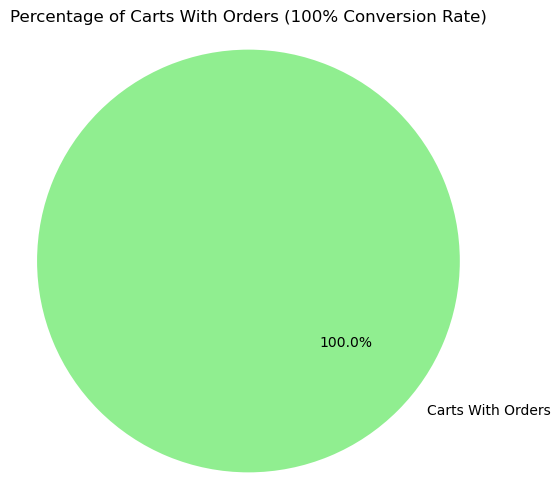

In [36]:
if ordered_percentage['CartsWithoutOrders'].iloc[0] == 0:
    # Creating a DataFrame for pie chart
    df = pd.DataFrame({'CartsWithOrders': [ordered_percentage['TotalCarts'].iloc[0]]},
                      index=['Carts With Orders'])

    # Plotting the pie chart
    plt.figure(figsize=(6, 6))
    plt.pie(df['CartsWithOrders'], labels=df.index, autopct='%1.1f%%', startangle=140, colors=['lightgreen'])
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
    plt.title('Percentage of Carts With Orders (100% Conversion Rate)')
    plt.show()
else:
    # CartsWithoutOrders is non-zero, follow the previous code
    df = pd.DataFrame({'CartsWithoutOrders': [ordered_percentage['CartsWithoutOrders'].iloc[0],
                                              ordered_percentage['TotalCarts'].iloc[0] - ordered_percentage['CartsWithoutOrders'].iloc[0]]},
                      index=['Carts Without Orders', 'Carts With Orders'])

    # Plotting the pie chart
    plt.figure(figsize=(8, 8))
    plt.pie(df['CartsWithoutOrders'], labels=df.index, autopct='%1.1f%%', startangle=140, colors=['lightcoral', 'lightgreen'])
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
    plt.title('Percentage of Carts Without Orders')
    plt.show()

By this Pie chart we can see that we have a 100% conversion rate where every customer who adds products in his cards proceeds to place an order.

# Fourth Query:
Top 5 customer's based on the time they have interacted with a staff member through a call for queries.

In [11]:
query = """
SELECT
    c.Customer_ID,
    c.Customer_Firstname,
    c.Customer_Lastname,
    SUM(i.Interaction_Duration) AS TotalInteractionDuration
FROM
    Interaction i
JOIN
    Customer c ON i.Customer_ID = c.Customer_ID
GROUP BY
    c.Customer_ID, c.Customer_Firstname, c.Customer_Lastname
ORDER BY
    TotalInteractionDuration DESC
LIMIT 5;
"""

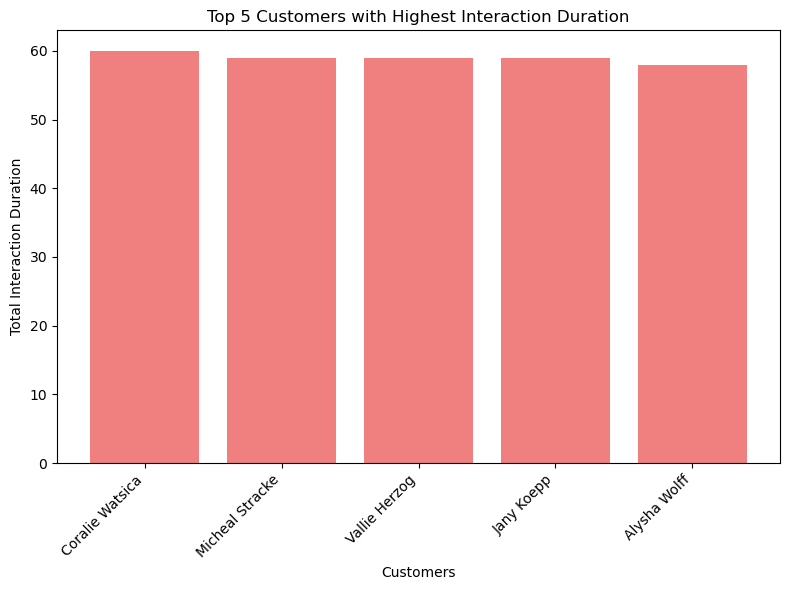

In [16]:
top_interacted_customers = fetch_data(query)

plt.figure(figsize=(8, 6))
plt.bar(top_interacted_customers['Customer_Firstname'] + ' ' + top_interacted_customers['Customer_Lastname'],
        top_interacted_customers['TotalInteractionDuration'], color='lightcoral')

plt.xlabel('Customers')
plt.ylabel('Total Interaction Duration')
plt.title('Top 5 Customers with Highest Interaction Duration')
plt.xticks(rotation=45, ha='right')  
plt.tight_layout()

# Fifth Query:
Percentage of products sold by ourselves vs products sold by Pharmacy's.

In [29]:
query="""
SELECT
    COUNT(CASE WHEN Pharmacy_ID IS NULL THEN 1 END) AS Own_Products,
    COUNT(*) AS TotalOrders,
    (COUNT(CASE WHEN Pharmacy_ID IS NULL THEN 1 END) / COUNT(*)) * 100 AS Percentage
FROM
    product;
Group by
    Own_Products;
    """

own_products_percentage = fetch_data(query)

In [30]:
own_products_percentage.head()

,Own_Products,TotalOrders,Percentage
0,0,1000,0.0000


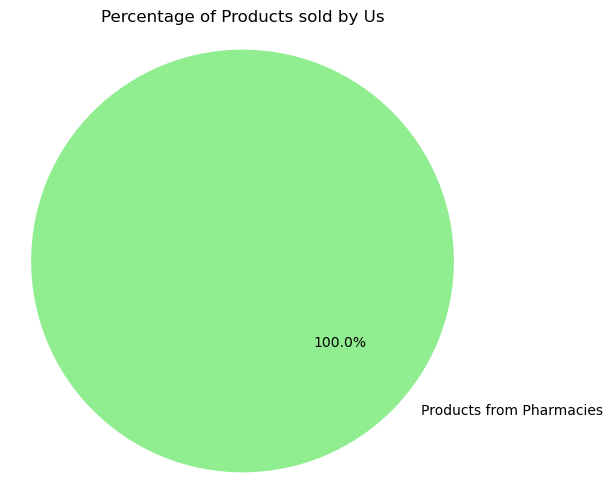

In [38]:
if own_products_percentage['Own_Products'].iloc[0] == 0:
    
    # Creating a DataFrame for pie chart
    df = pd.DataFrame({'Own_Products': [own_products_percentage['TotalOrders'].iloc[0]]},
                      index=['Products from Pharmacies'])

    # Plotting the pie chart
    plt.figure(figsize=(6, 6))
    plt.pie(df['Own_Products'], labels=df.index, autopct='%1.1f%%', startangle=140, colors=['lightgreen'])
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
    plt.title('Percentage of Products sold by Us')
    plt.show()
else:
    # CartsWithoutOrders is non-zero, follow the previous code
    df = pd.DataFrame({'Own_Products': [oown_products_percentage['Own_Products'].iloc[0],
                                              own_products_percentage['TotalOrders'].iloc[0] - own_products_percentage['Own_Products'].iloc[0]]},
                      index=['Own Products', 'Products from Pharmacies'])

    # Plotting the pie chart
    plt.figure(figsize=(8, 8))
    plt.pie(df['Own_Products'], labels=df.index, autopct='%1.1f%%', startangle=140, colors=['lightcoral', 'lightgreen'])
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
    plt.title('Percentage of Products sold by Us')
    plt.show()

Based on this Pie chart we see that we were not able to sell any products listed by us and all the customers prefer to oredr from The Pharmacies they are familiar with.

# Sixth Query:
Top 20 Customer's who left a review for their purchase based on the number of reviews they have given.

In [55]:
query="""
SELECT
    c.Customer_Firstname as FirstName,
    c.Customer_Lastname as Last,
    MAX(r.Review_Number) AS TotalReviews
FROM
    Customer c
LEFT JOIN
    Review r ON c.Customer_ID = r.Customer_ID
WHERE
    r.Review_Number >= ALL (
        SELECT
            Review_Number
        FROM
            Review
        WHERE
            Customer_ID = c.Customer_ID
    )
GROUP BY
    c.Customer_ID, c.Customer_Firstname, c.Customer_Lastname
ORDER BY
    TotalReviews DESC
LIMIT 20;
"""

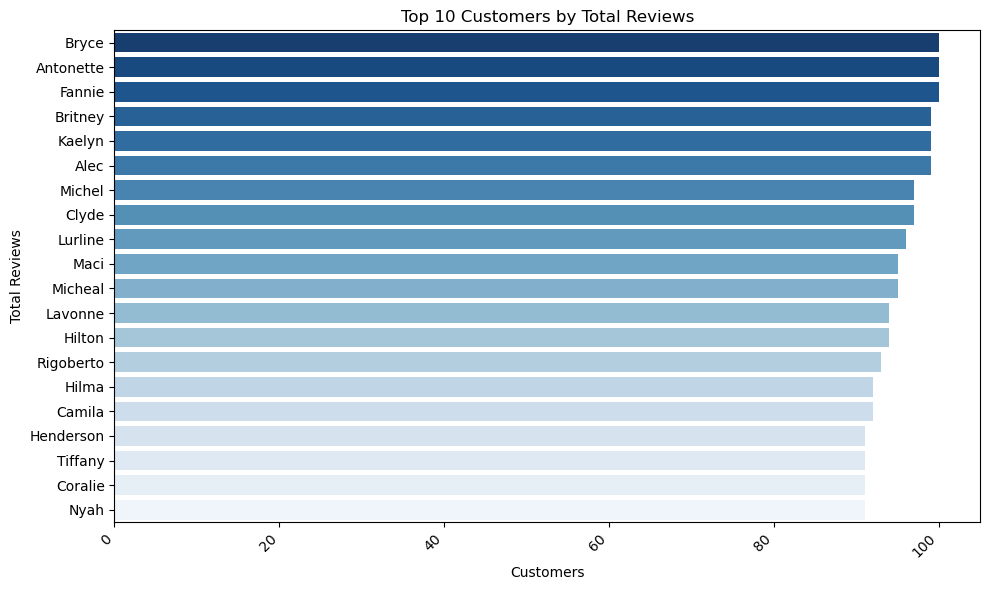

In [56]:
df= fetch_data(query)

plt.figure(figsize=(10, 6))
sns.barplot(x='TotalReviews', y='FirstName' , data=df, palette='Blues_r')

plt.title('Top 10 Customers by Total Reviews')
plt.xlabel('Customers')
plt.ylabel('Total Reviews')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Show the plot
plt.show()

In [58]:
if (conn.is_connected()):
 conn.close()
 print("MySQL connection is closed")

MySQL connection is closed
